# Customer Segmentation using <strong>Unsupervisd Learning</strong> 

In large buiseness firms the major aspect to deal with is the large amount of data, many a time the data is unorganized and oftent hard to interpret.

One such aspect id Feedback from coustomer --

Just to bring in pespective it issue can be

Understanding weather the coustomer are happy with a product or not.
What issues they are faceing .
Same issues are asked multiple times  
Replaying to same issues multiple topic_names
Understanding the latest common problem faced by a major group of coustomers.



#### This Notebook helps in two major steps <br>
* <strong>Topic Modeling</strong> <br>
* <strong>Segmentation</strong> <br>

### Importing Library

In [ ]:
import pandas as pd
import numpy as np
# for converting Worrds into Vectors
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# for implementing lemmatization
from nltk.stem import WordNetLemmatizer
# for splitting string into substring
from nltk.tokenize import RegexpTokenizer
# for makeing processing fast
from sklearn.preprocessing import StandardScaler
# for ploting the TSNE plot
from sklearn.manifold import TSNE
import seaborn as sns
# for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [ ]:
data = pd.read_csv("/content/Review_Data.csv")

In [ ]:
data.drop(['reviewId','userImage','at','repliedAt'],inplace=True,axis=1)

In [ ]:
data.head()

userName  ...      appId
0                          Eric Tie  ...  com.anydo
1                        john alpha  ...  com.anydo
2                       Sudhakar .S  ...  com.anydo
3  SKGflorida@bellsouth.net DAVID S  ...  com.anydo
4                     Louann Stoker  ...  com.anydo

[5 rows x 8 columns]

In [ ]:
data.userName = data.userName.str.lower()
data.content = data.content.str.lower()
data.replyContent = data.replyContent.str.lower()

In [ ]:
data.content= data.content.str.replace('[^\w\s\.]','')

In [ ]:
data.content

0                            i cannot open the app anymore
1        i have been begging for a refund from this app...
2        very costly for the premium version approx ind...
3        used to keep me organized but all the 2020 upd...
4                                      dan birthday oct 28
                               ...                        
12490    i really like the planner it helps me achieve ...
12491                                                     
12492                    very useful apps. you must try it
12493    would pay for this if there were even more add...
12494                                           sooow good
Name: content, Length: 12495, dtype: object

In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
text1 = data.content.values

In [ ]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    keywords = ' '.join(keywords)
    return keywords

In [ ]:
corpus=[]
for i in range(len(text1)):
    #text1[i]=text1[i].replace('@VirginAmerica','')
    text1[i]=text1[i].replace("cant't",'can not')
    text1[i]=text1[i].replace("don't",'do not')
    text1[i]=text1[i].replace("dont",'do not')
    text1[i]=text1[i].replace("should't",'should not')
    text1[i]=text1[i].replace("could't",'could not')
    text1[i]=text1[i].replace("couldn",'could not')
    text1[i]=text1[i].replace("did't",'did not')
    text1[i]=text1[i].replace("didn",'did not')
    text1[i]=text1[i].replace("does't",'does not')
    text1[i]=text1[i].replace("doesn",'does not')
    text1[i]=text1[i].replace("ive",'i have')
    text1[i]=text1[i].replace("nott",'not')
    text1[i]=text1[i].replace("im",'i am')

    text1[i] = re.sub(r"(?:\@|https?\://)\S+", "", text1[i])
    #review=re.sub('[^a-zA-Z]',' ',text1[i])
    review = preprocess_text(text1[i])
    # review = review.lower()
    # review = review.split()
    #review = ' '.join(review)
    
    corpus.append(review)
   

In [ ]:
corpus

['cannot open app anymore',
 'beg refund app month nobody reply',
 'costly premium version approx indian rupees 910 per year better download premium version app apkmos website use microsoft list app far better',
 'use keep organize 2020 update make mess things cudnt u leave well enuf alone guess ur techies feel need keep make change justify continue collect salary']

### Coverting Words into Tokens and Creating TFidf Matrix


In [ ]:
tokens_without_sw = corpus#[word for word in corpus if not word in ss]

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(tokens_without_sw)
tfidf_data = tfidf_vectorizer.fit_transform(tokens_without_sw)

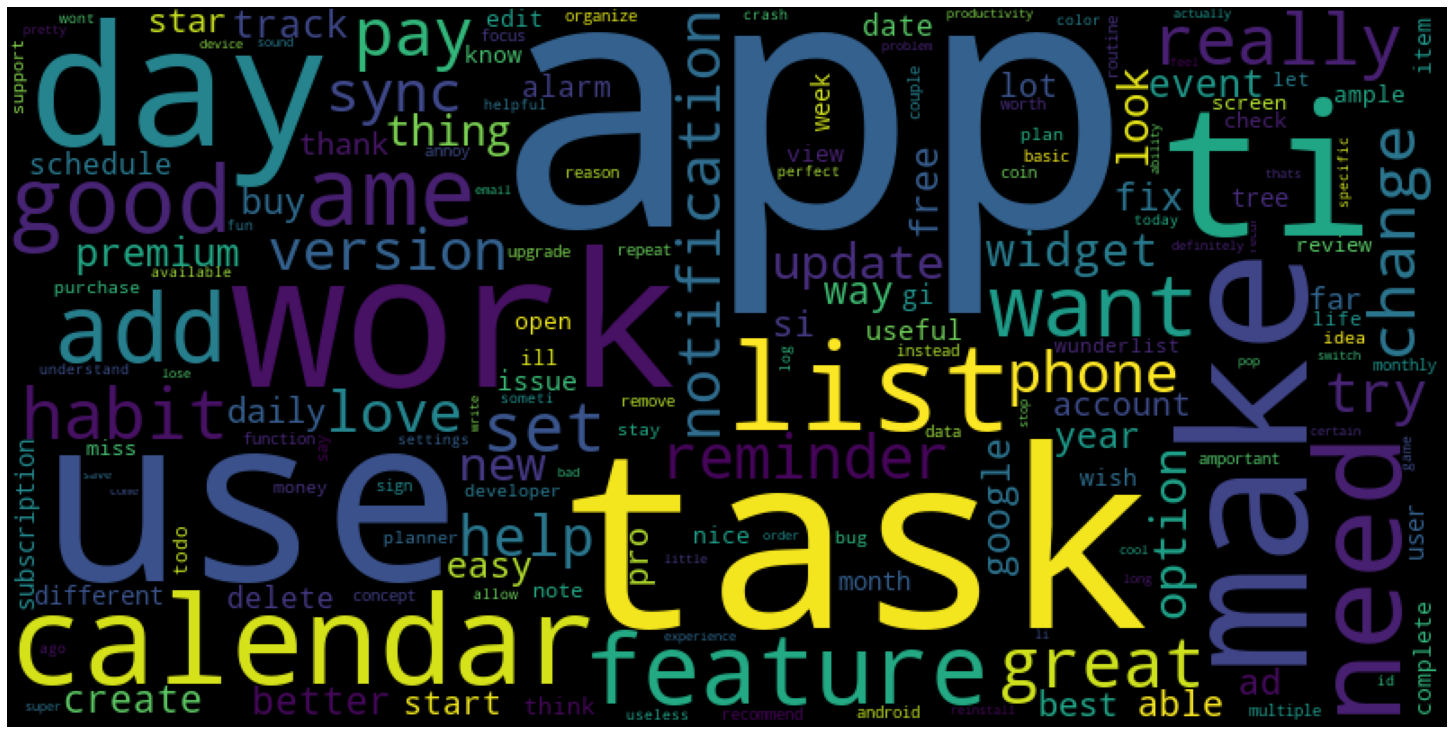

In [ ]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

### Dimentionality Reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD, NMF

n_comp = 10
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

## Topic Modelling


This is a very Importent Algorithum which helps in understanding the Major <br> Aspects or <strong>topics</strong> which a <strong>major part for the customer feedback talks about</strong>.



In [ ]:
def display_topics(model,names, no_top_words=10, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

In [ ]:
display_topics(lsa_tfidf,tfidf_vectorizer.get_feature_names(),10)


Topic 0
good (0.9064), app (0.2357), good app (0.1666), great (0.0811), use (0.0788), task (0.0624), work (0.0567), ti (0.0553), like (0.0544), ame (0.0496)

Topic 1
app (0.4558), great (0.2971), use (0.1971), great app (0.1702), love (0.1656), task (0.1579), ti (0.1498), work (0.1462), ame (0.1349), like (0.1346)

Topic 2
great (0.7735), great app (0.3853), app (0.0437), good (0.0282), app great (0.0215), work great (0.0157), really great (0.0138), great tool (0.0102), great way (0.0075), great concept (0.0071)

Topic 3
nice (0.8378), nice app (0.3253), app (0.1407), great (0.1380), great app (0.0933), good app (0.0252), app nice (0.0172), app useful (0.0071), really nice (0.0071), app love (0.0062)

Topic 4
love (0.7392), app (0.2613), love app (0.2390), good app (0.0941), app love (0.0469), best (0.0355), awesome (0.0319), easy (0.0290), easy use (0.0276), really love (0.0262)

Topic 5
easy (0.5267), use (0.4865), easy use (0.4834), si (0.1240), ample (0.1212), si ample (0.1212), a

## Building a Clustering Algorithium

In [ ]:

SS = StandardScaler()
# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
lsa_cv_data_sclaed = SS.fit_transform(lsa_cv_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)
nmf_cv_data_scaled = SS.fit_transform(nmf_cv_data)

In [ ]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(lsa_tfidf_data_sclaed)
    labels = km.labels_

    Sil_coefs.append(silhouette_score(lsa_tfidf_data_sclaed, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

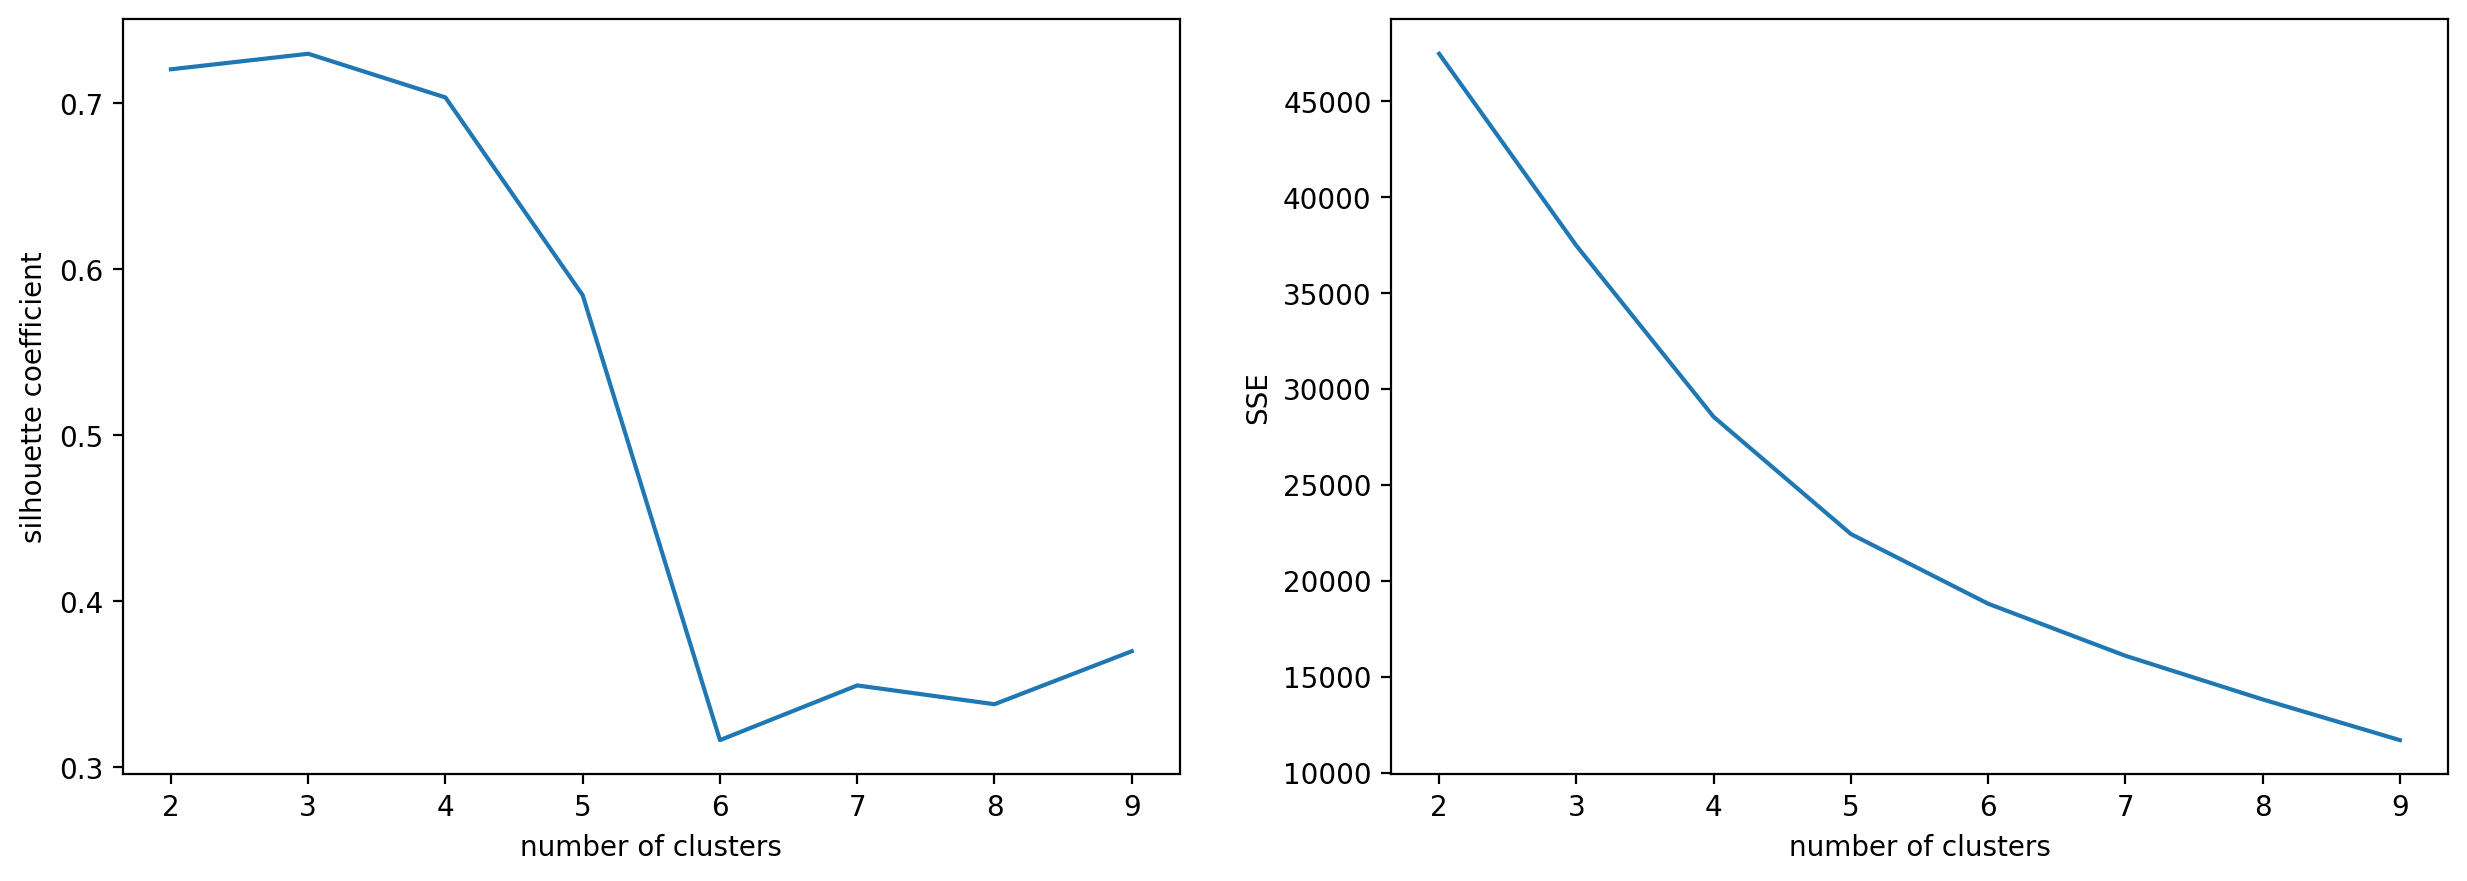

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [ ]:
# running cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(lsa_tfidf_data_sclaed)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:25]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['abandon', 'abilities', 'ability', 'ability add', 'aap']
cluster1:
['ability', 'abandon', 'aap', 'ability add', 'abilities']
cluster2:
['aap', 'abilities', 'ability', 'ability add', 'abandon']
cluster3:
['ability add', 'abandon', 'aap', 'abilities', 'ability']
cluster4:
['abilities', 'abandon', 'ability', 'aap', 'ability add']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 10495 samples in 0.010s...
[t-SNE] Computed neighbors for 10495 samples in 0.875s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10495
[t-SNE] Computed conditional probabilities for sample 2000 / 10495
[t-SNE] Computed conditional probabilities for sample 3000 / 10495
[t-SNE] Computed conditional probabilities for sample 4000 / 10495
[t-SNE] Computed conditional probabilities for sample 5000 / 10495
[t-SNE] Computed conditional probabilities for sample 6000 / 10495
[t-SNE] Computed conditional probabilities for sample 7000 / 10495
[t-SNE] Computed conditional probabilities for sample 8000 / 10495
[t-SNE] Computed conditional probabilities for sample 9000 / 10495
[t-SNE] Computed conditional probabilities for sample 10000 / 10495
[t-SNE] Computed conditional probabilities for sample 10495 / 10495
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.255272
[t-SNE] KL

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


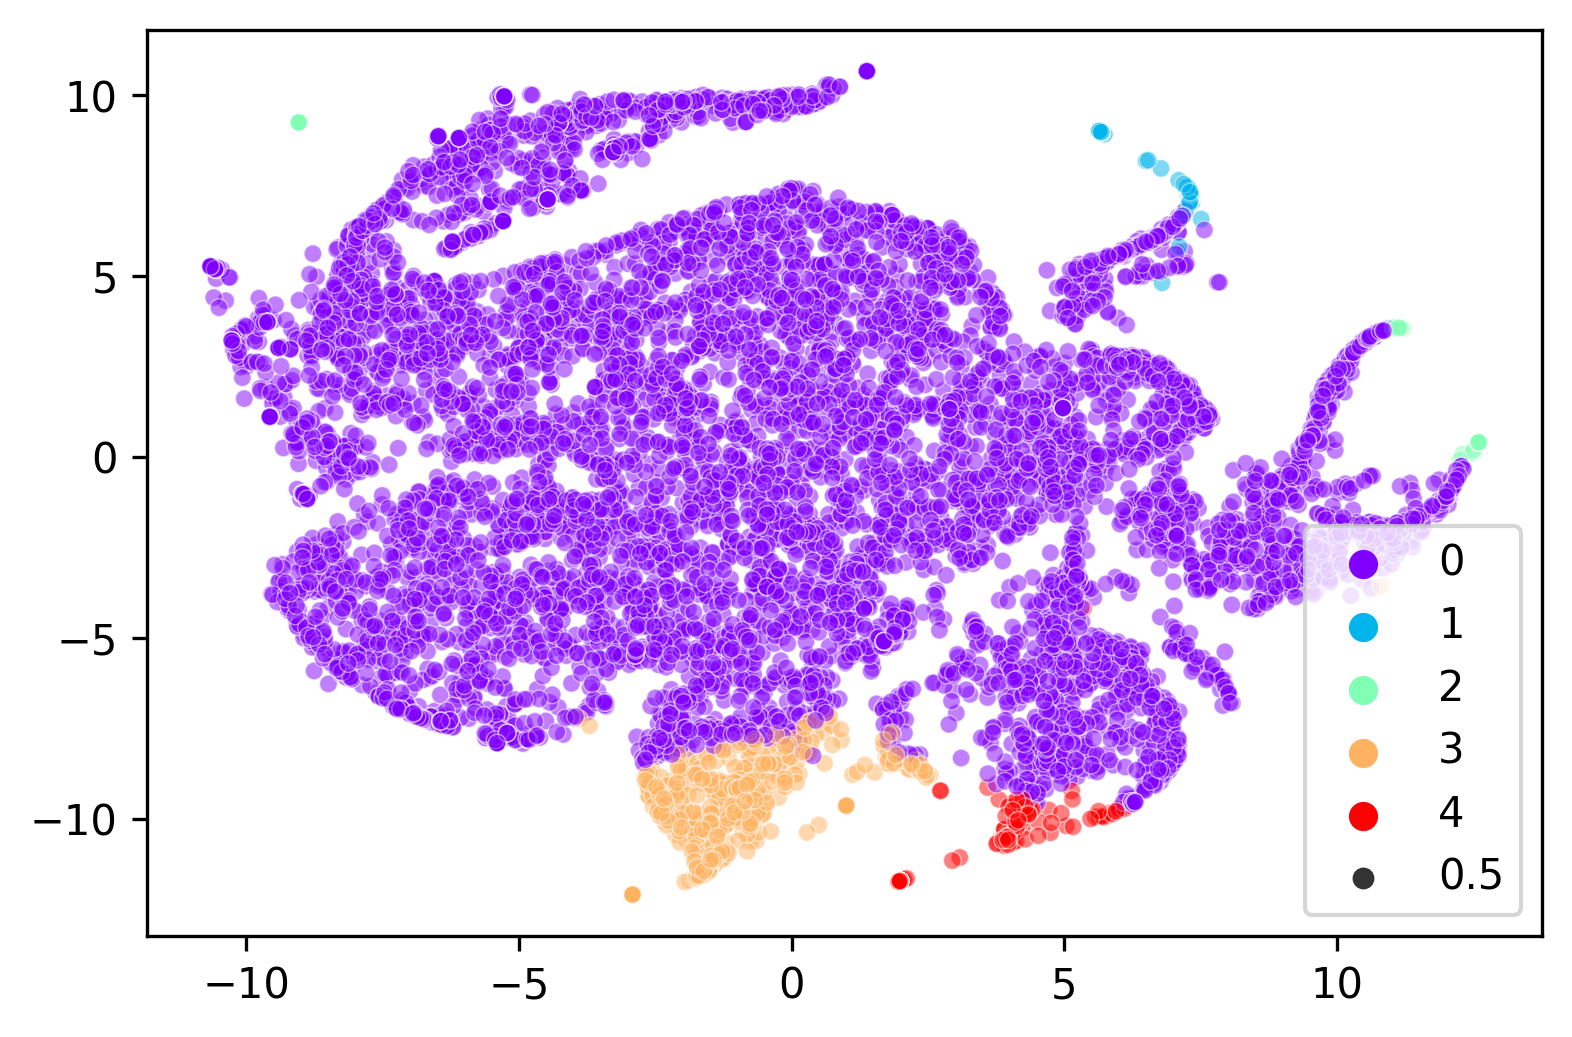

In [ ]:

tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(lsa_tfidf_data_sclaed[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

## Storing the Final Result into CSV

In [ ]:
val = 2
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==val]

sent = []
label = []

for rev_index in indices_max:
    #print(rev_index, str(tokens_without_sw[rev_index]))
    sent.append(tokens_without_sw[rev_index])
    label.append(val)


In [ ]:
df2.to_csv('Newrev_{}.csv'.format(val),index=False)

#### Catagory 0

In [ ]:
df = {'review':sent,'lebel':label}
df2 = pd.DataFrame(df)
df2.head(10)

review  lebel
0                            cannot open app anymore      0
1                  beg refund app month nobody reply      0
2  costly premium version approx indian rupees 91...      0
3  use keep organize 2020 update make mess things...      0
4                                dan birthday oct 28      0
5  change view different list jumble together can...      0
6  look grocery list app every ti ame tap away ap...      0
7      reset free trial new phone id like see better      0
8               stop monthly payment use app anymore      0
9  complain crash ammediately fixedgood job crash...      0

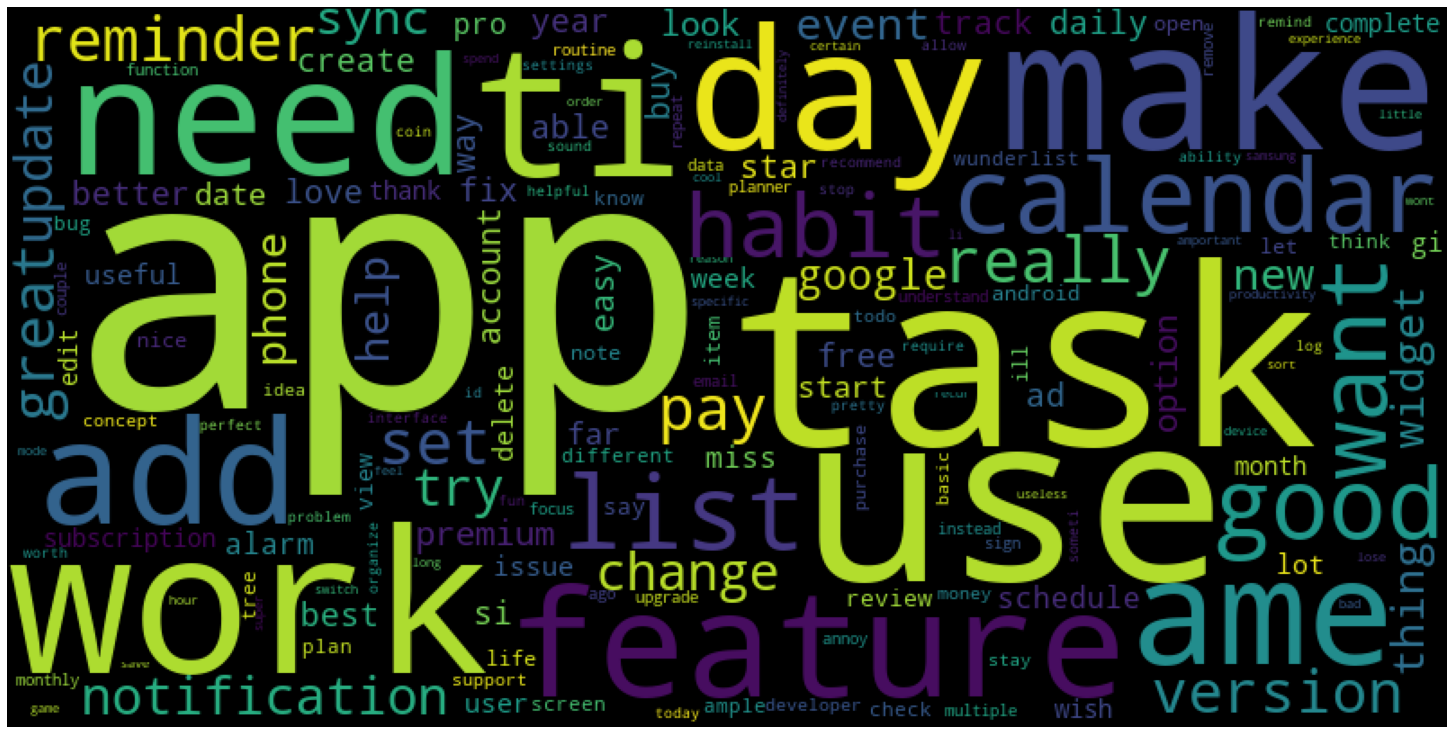

In [ ]:
cv(sent)

#### Category 1

In [ ]:
df = {'review':sent,'lebel':label}
df2 = pd.DataFrame(df)
df2.iloc[100:110].values

array([['nice', 1],
       ['nice', 1],
       ['nice app easy use', 1],
       ['nice better app get inhabit counter example count pushups exercise need app nice recommend',
        1],
       ['nice', 1],
       ['nice app use full', 1],
       ['nice', 1],
       ['nice app', 1],
       ['nice app', 1],
       ['nice app', 1]], dtype=object)

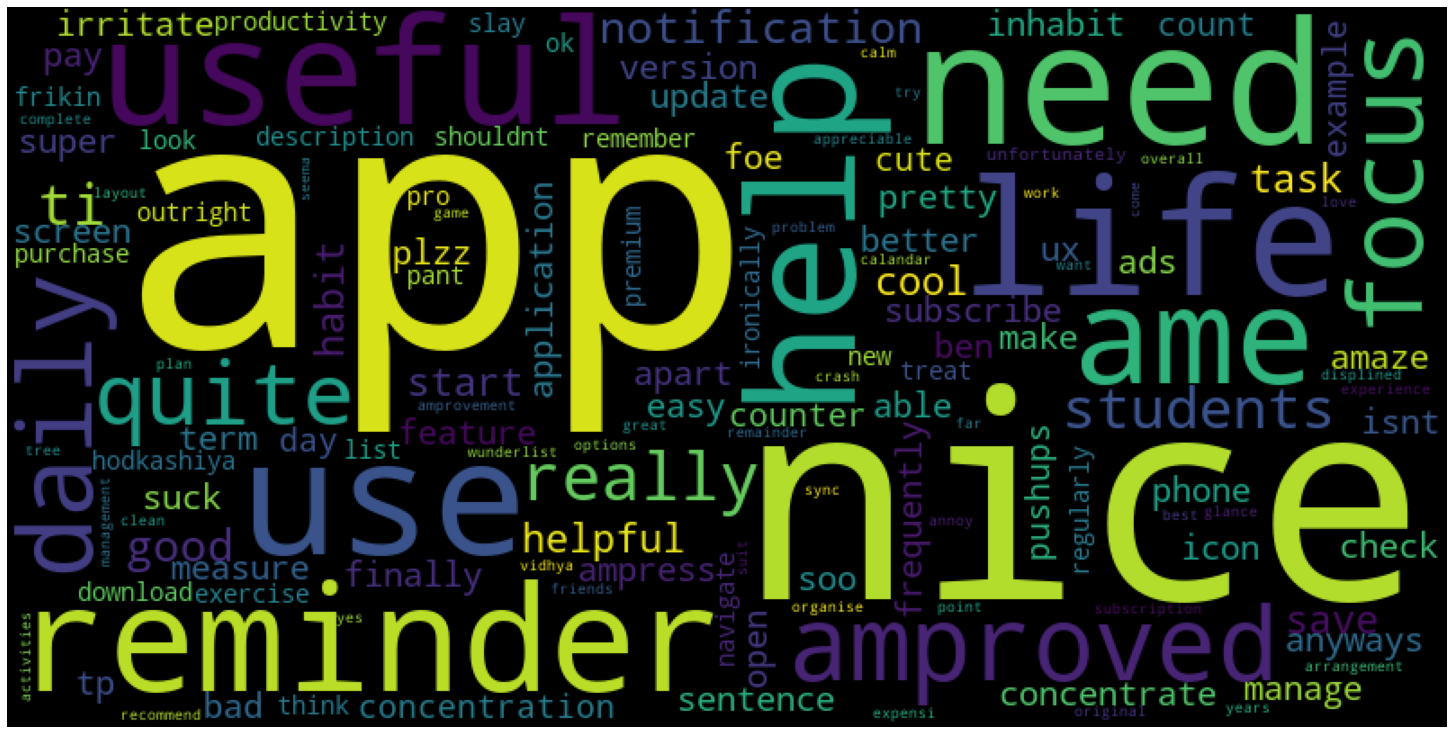

In [ ]:
cv(sent)

#### Category 2

In [ ]:
df = {'review':sent,'lebel':label}
df2 = pd.DataFrame(df)
df2[df2.review!='good'].values[10:20]

array([['good app', 2],
       ['good app', 2],
       ['good app', 2],
       ['good bt nt look', 2],
       ['good without premium', 2],
       ['good app', 2],
       ['good app', 2],
       ['pretty good good app need', 2],
       ['good app', 2],
       ['good app', 2]], dtype=object)

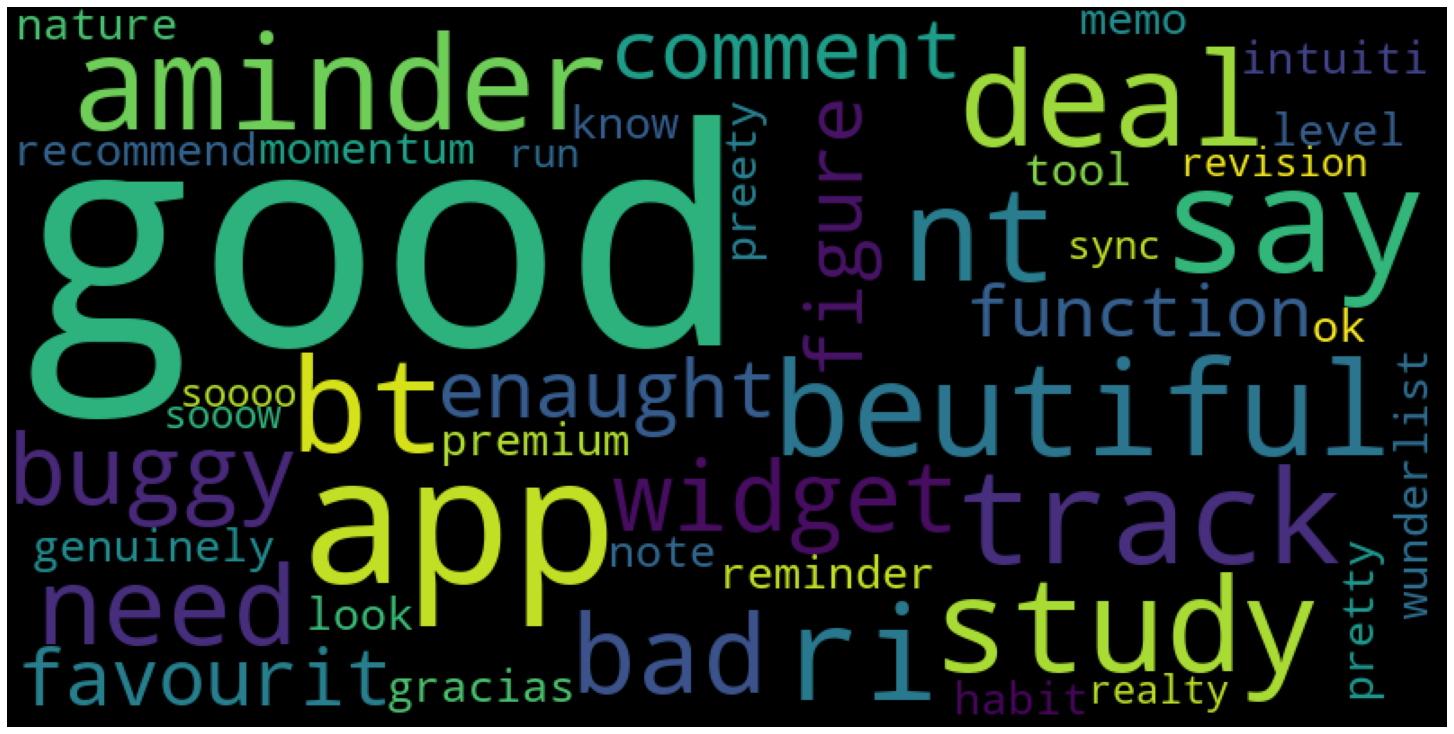

In [ ]:
cv(sent)

#### Category 3

In [ ]:
df = {'review':sent,'lebel':label}
df2 = pd.DataFrame(df)
df2[df2.review!='good'].values[10:20]

array([['love app 8have usinfg quit thing font like list option though wish make morning routine please see fix thank',
        3],
       ['love app wish add due date task', 3],
       ['love app previous issue randomly log resolve', 3],
       ['great app love use daily', 3],
       ['love app', 3],
       ['love super helpful get focus ans organize super easy use love reminders',
        3],
       ['love', 3],
       ['love integration whatsapp feel like private secretary', 3],
       ['love app use years', 3],
       ['love app make better people', 3]], dtype=object)

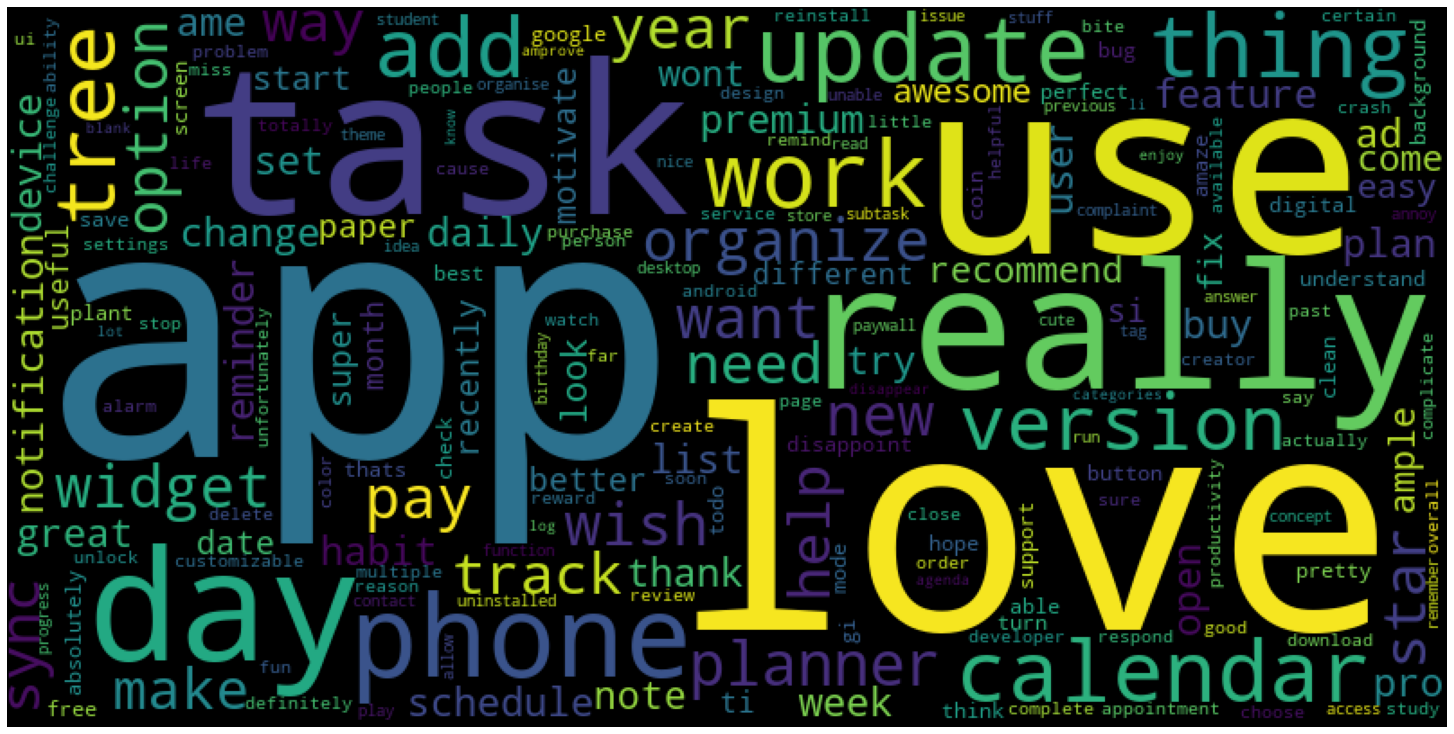

In [ ]:
cv(sent)

#### Catagory 4

In [ ]:
df = {'review':sent,'lebel':label}
df2 = pd.DataFrame(df)
df2[df2.review!='good'].values[10:20]

array([['great useful', 4],
       ['great app', 4],
       ['must install great app manges plan instant super organise manner reminder great great feature manage ti ame task',
        4],
       ['great app', 4],
       ['great app', 4],
       ['great app record follow daily activities', 4],
       ['great apps', 4],
       ['great', 4],
       ['great app', 4],
       ['would great set esti amated ti ame every activity great', 4]],
      dtype=object)

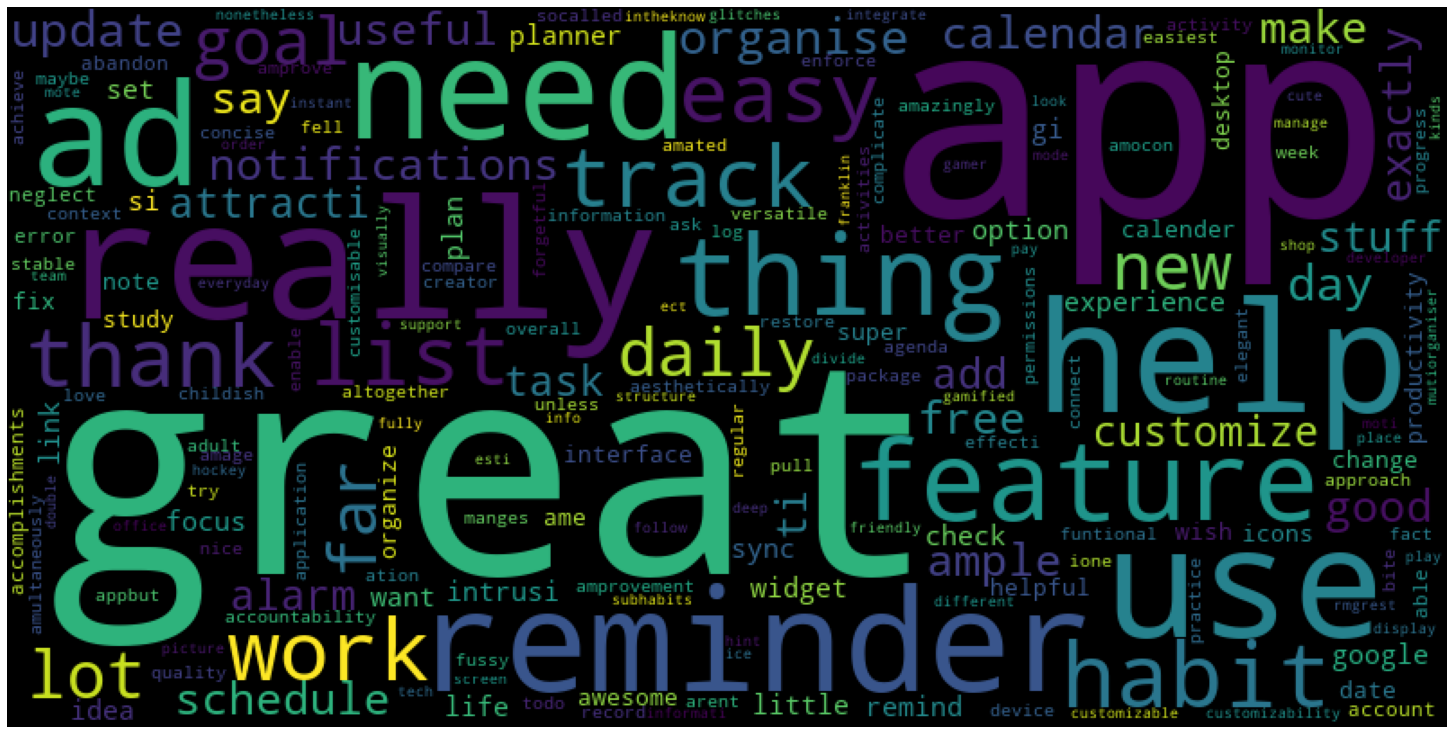

In [ ]:
cv(sent)

In [ ]:
def cv(tokens):
  count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
  cv_data = count_vectorizer.fit_transform(tokens)

  for_wordcloud = count_vectorizer.get_feature_names()
  for_wordcloud = for_wordcloud
  for_wordcloud_str = ' '.join(for_wordcloud)

  wordcloud = WordCloud(width=800, height=400, background_color ='black',
                        min_font_size = 7).generate(for_wordcloud_str)

  plt.figure(figsize=(20, 10), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  
  plt.show()

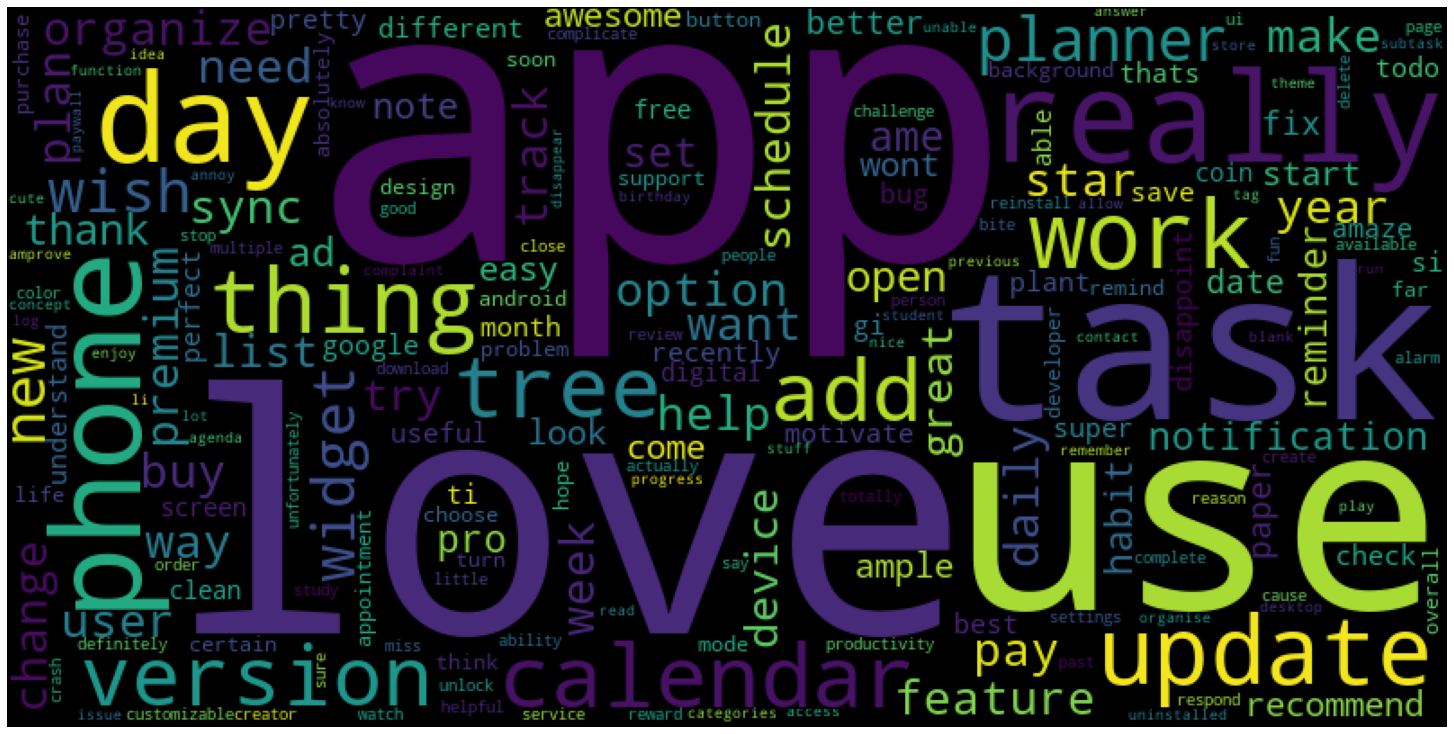